# Loading all libraries

In [466]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm as SVM_MODEL
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset 1

In [467]:
df = pd.read_csv("lungcancer.csv")		

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 312 non-null    object 
 1   AGE                    312 non-null    int64  
 2   SMOKING                312 non-null    int64  
 3   YELLOW_FINGERS         312 non-null    int64  
 4   ANXIETY                312 non-null    int64  
 5   PEER_PRESSURE          311 non-null    float64
 6   CHRONIC DISEASE        311 non-null    float64
 7   FATIGUE                312 non-null    int64  
 8   ALLERGY                311 non-null    float64
 9   WHEEZING               312 non-null    int64  
 10  ALCOHOL CONSUMING      312 non-null    int64  
 11  COUGHING               312 non-null    int64  
 12  SHORTNESS OF BREATH    312 non-null    int64  
 13  SWALLOWING DIFFICULTY  312 non-null    int64  
 14  CHEST PAIN             312 non-null    int64  
 15  LUNG_C

In [469]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,312.000000,312.000000,312.000000,312.000000,311.000000,311.000000,312.000000,311.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,62.560897,1.557692,1.573718,1.493590,1.498392,1.508039,1.676282,1.556270,1.560897,1.557692,1.583333,1.641026,1.464744,1.560897
std,8.249884,0.497458,0.495330,0.500762,0.500803,0.500741,0.468645,0.497624,0.497075,0.497458,0.493799,0.480470,0.499557,0.497075
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [470]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1.0,1.0,2,1.0,2,2,2,2,2,2,YES
1,M,74,2,1,1,1.0,2.0,2,2.0,1,1,1,2,2,2,YES
2,F,59,1,1,1,2.0,1.0,2,1.0,2,1,2,2,1,2,NO
3,M,63,2,2,2,1.0,1.0,1,1.0,1,2,1,1,2,2,NO
4,F,63,1,2,1,1.0,1.0,1,1.0,2,1,2,2,1,1,NO


# Preprocessing

# Checking for null values

In [471]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            1
CHRONIC DISEASE          1
FATIGUE                  0
ALLERGY                  1
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# Removing null values

In [472]:
df["PEER_PRESSURE"] = df["PEER_PRESSURE"].fillna(df["PEER_PRESSURE"].mode()[0])
df['CHRONIC DISEASE'] = df['CHRONIC DISEASE'].fillna(df['CHRONIC DISEASE'].mean())
df['ALCOHOL CONSUMING'] = df['ALCOHOL CONSUMING'].fillna(df['ALCOHOL CONSUMING'].median())
df['ALLERGY'] = df['ALLERGY'].fillna(df['ALLERGY'].median())
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# Checking for duplicate values

In [473]:
df.duplicated().sum()

33

# Removing duplicate values

In [474]:
df.drop_duplicates(inplace=True)

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 311
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 279 non-null    object 
 1   AGE                    279 non-null    int64  
 2   SMOKING                279 non-null    int64  
 3   YELLOW_FINGERS         279 non-null    int64  
 4   ANXIETY                279 non-null    int64  
 5   PEER_PRESSURE          279 non-null    float64
 6   CHRONIC DISEASE        279 non-null    float64
 7   FATIGUE                279 non-null    int64  
 8   ALLERGY                279 non-null    float64
 9   WHEEZING               279 non-null    int64  
 10  ALCOHOL CONSUMING      279 non-null    int64  
 11  COUGHING               279 non-null    int64  
 12  SHORTNESS OF BREATH    279 non-null    int64  
 13  SWALLOWING DIFFICULTY  279 non-null    int64  
 14  CHEST PAIN             279 non-null    int64  
 15  LUNG_CANCER

# Encoding values in GENDER AND LUNG_CANCER columns

In [476]:
label_encoder = LabelEncoder()
df = pd.get_dummies(df, columns=['GENDER'])
df["GENDER_F"] = label_encoder.fit_transform(df["GENDER_F"])
df["GENDER_M"] = label_encoder.fit_transform(df["GENDER_M"])
df["F"] = df["GENDER_F"]
df["M"] = df["GENDER_M"]
df.drop(columns=["GENDER_F", "GENDER_M"], inplace=True)
df["LUNG_CANCER"] = label_encoder.fit_transform(df["LUNG_CANCER"])

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 311
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    279 non-null    int64  
 1   SMOKING                279 non-null    int64  
 2   YELLOW_FINGERS         279 non-null    int64  
 3   ANXIETY                279 non-null    int64  
 4   PEER_PRESSURE          279 non-null    float64
 5   CHRONIC DISEASE        279 non-null    float64
 6   FATIGUE                279 non-null    int64  
 7   ALLERGY                279 non-null    float64
 8   WHEEZING               279 non-null    int64  
 9   ALCOHOL CONSUMING      279 non-null    int64  
 10  COUGHING               279 non-null    int64  
 11  SHORTNESS OF BREATH    279 non-null    int64  
 12  SWALLOWING DIFFICULTY  279 non-null    int64  
 13  CHEST PAIN             279 non-null    int64  
 14  LUNG_CANCER            279 non-null    int32  
 15  F          

In [478]:
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,F,M
0,69,1,2,2,1.0,1.0,2,1.0,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1.0,2.0,2,2.0,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2.0,1.0,2,1.0,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1.0,1.0,1,1.0,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1.0,1.0,1,1.0,2,1,2,2,1,1,0,1,0


# Changing column positions

In [479]:
df = df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY',
         'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'M',
         'F', 'LUNG_CANCER']]
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,M,F,LUNG_CANCER
0,69,1,2,2,1.0,1.0,2,1.0,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1.0,2.0,2,2.0,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2.0,1.0,2,1.0,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1.0,1.0,1,1.0,1,2,1,1,2,2,1,0,0
4,63,1,2,1,1.0,1.0,1,1.0,2,1,2,2,1,1,0,1,0


# Logistic Regression

In [480]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,
                                                    random_state=42)

logistic_regression = LogisticRegression(max_iter=5000)
logistic_regression.fit(X_train, y_train)
logistic_regression_pred = logistic_regression.predict(X_test)
log_acc = accuracy_score(y_test, logistic_regression_pred)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_regression_pred))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, logistic_regression_pred))
print("Logistic Regression Classification Report: \n",
      classification_report(y_test, logistic_regression_pred, zero_division='warn'))

Logistic Regression Accuracy:  0.9642857142857143
Logistic Regression Confusion Matrix: 
 [[ 6  2]
 [ 0 48]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.96      1.00      0.98        48

    accuracy                           0.96        56
   macro avg       0.98      0.88      0.92        56
weighted avg       0.97      0.96      0.96        56



# SVM

In [481]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,random_state=42)
svm = SVM_MODEL.SVC(max_iter=15000)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("SVM Confusion Matrix: \n", confusion_matrix(y_test, svm_pred))
print("SVM Classification Report: \n", classification_report(y_test, svm_pred, zero_division='warn'))

SVM Accuracy:  0.8571428571428571
SVM Confusion Matrix: 
 [[ 0  8]
 [ 0 48]]
SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.86      1.00      0.92        48

    accuracy                           0.86        56
   macro avg       0.43      0.50      0.46        56
weighted avg       0.73      0.86      0.79        56



c:\Users\Rohithk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohithk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohithk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

# KNN

In [482]:

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,
                                                    random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))
print("KNN Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
print("KNN Classification Report: \n", classification_report(y_test, knn_pred, zero_division='warn'))


KNN Accuracy:  0.875
KNN Confusion Matrix: 
 [[ 1  7]
 [ 0 48]]
KNN Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.87      1.00      0.93        48

    accuracy                           0.88        56
   macro avg       0.94      0.56      0.58        56
weighted avg       0.89      0.88      0.83        56



# Decision Tree

In [483]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
dt_acc = accuracy_score(y_test, decision_tree_pred)
print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_pred))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test, decision_tree_pred))
print("Decision Tree Classification Report: \n",
      classification_report(y_test, decision_tree_pred, zero_division='warn'))


Decision Tree Accuracy:  0.8928571428571429
Decision Tree Confusion Matrix: 
 [[ 4  4]
 [ 2 46]]
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.92      0.96      0.94        48

    accuracy                           0.89        56
   macro avg       0.79      0.73      0.76        56
weighted avg       0.88      0.89      0.89        56



# Graphs


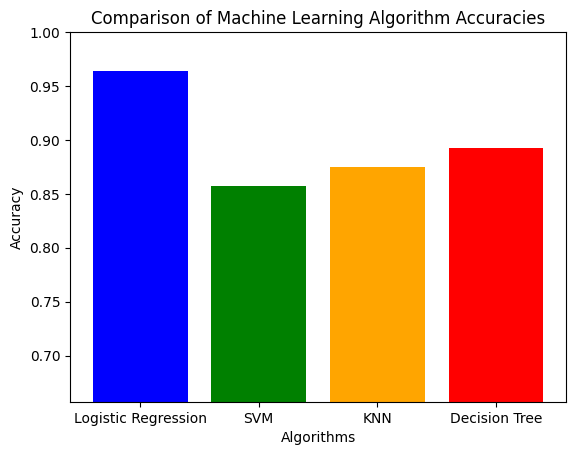

In [484]:

# Algorithms and their accuracies
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
accuracies = [log_acc, svm_acc, knn_acc, dt_acc]

# Create bar chart
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Algorithm Accuracies')
plt.ylim(min(accuracies) - 0.2, 1.0)
plt.show()


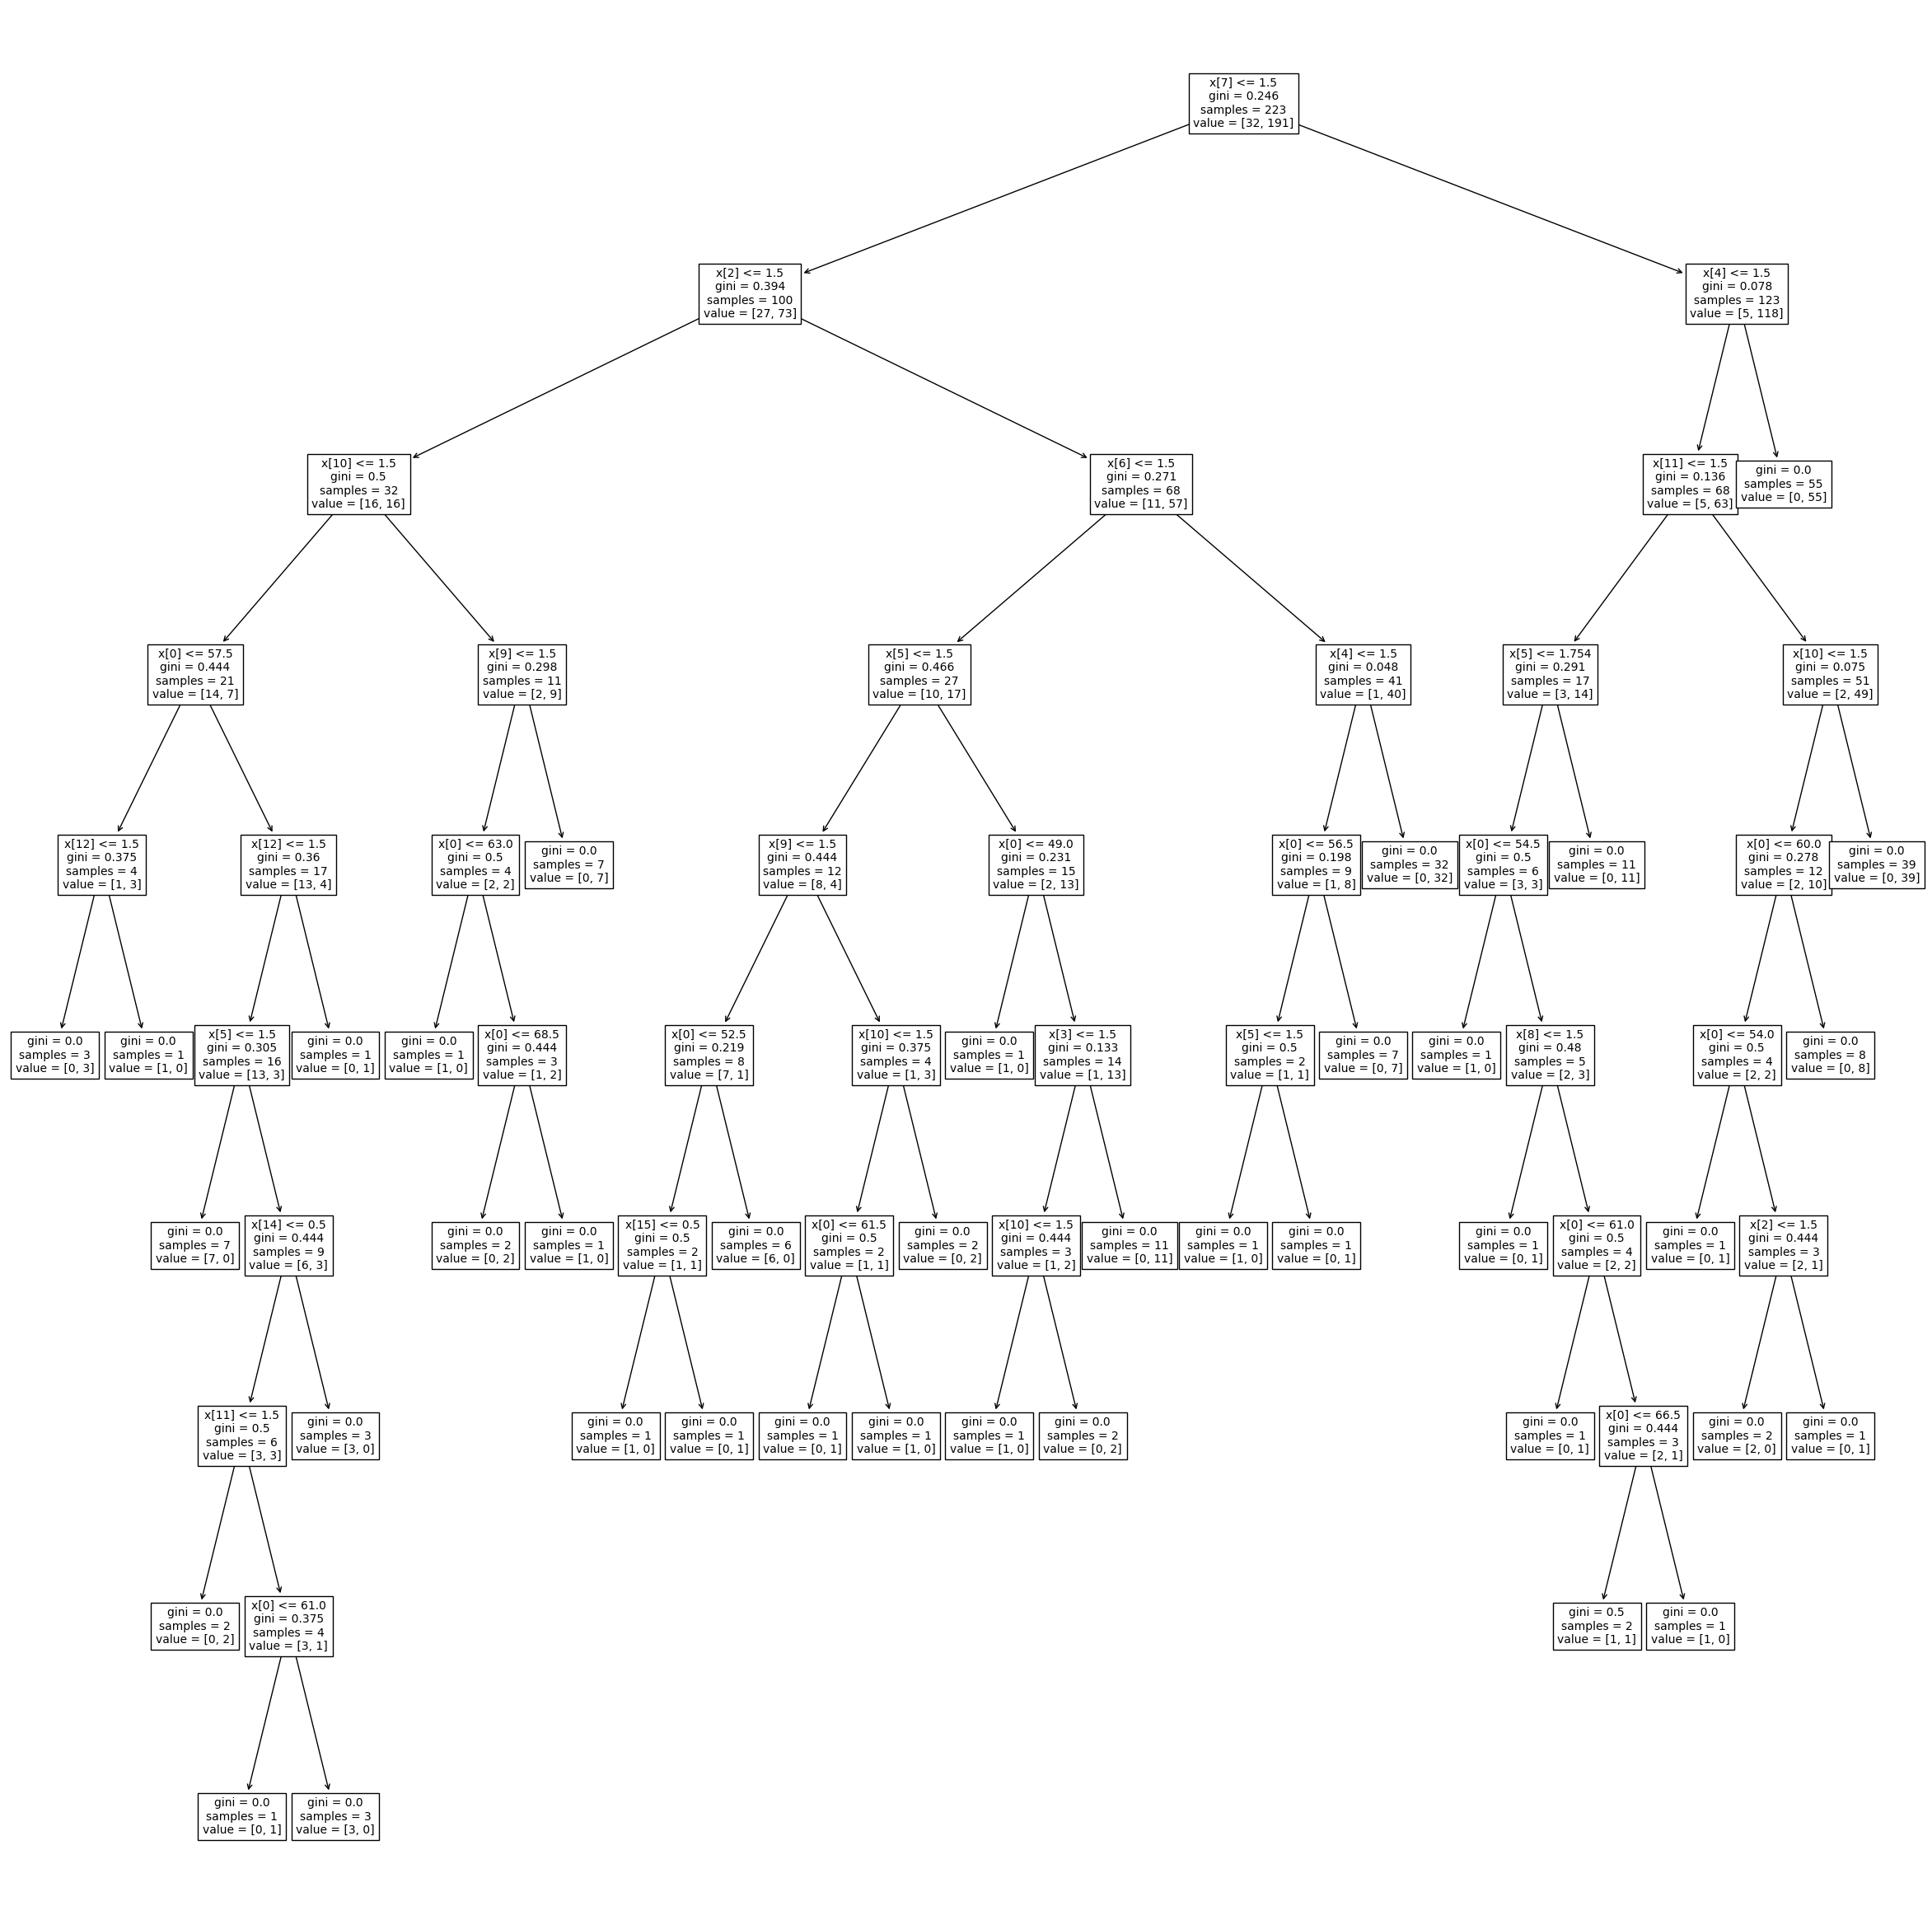

In [485]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(decision_tree,fontsize=10)
plt.show()

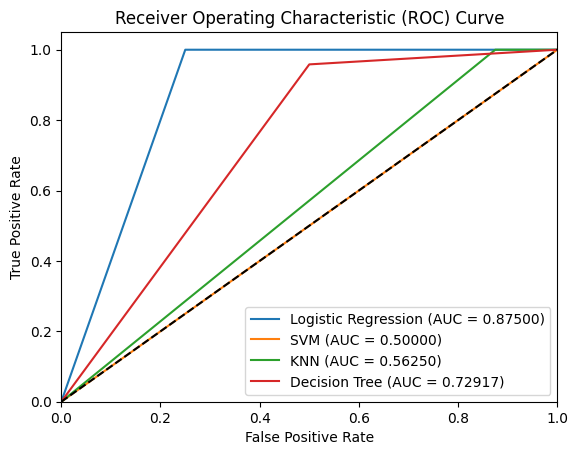

In [486]:
y_true_lr = y_test
y_scores_lr = logistic_regression_pred

y_true_svm = y_test
y_scores_svm = svm_pred

y_true_knn = y_test
y_scores_knn = knn_pred

y_true_dt = y_test
y_scores_dt = decision_tree_pred

fpr_lr, tpr_lr, _ = roc_curve(y_true_lr, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_true_svm, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_true_knn, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_true_dt, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.5f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.5f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.5f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.5f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

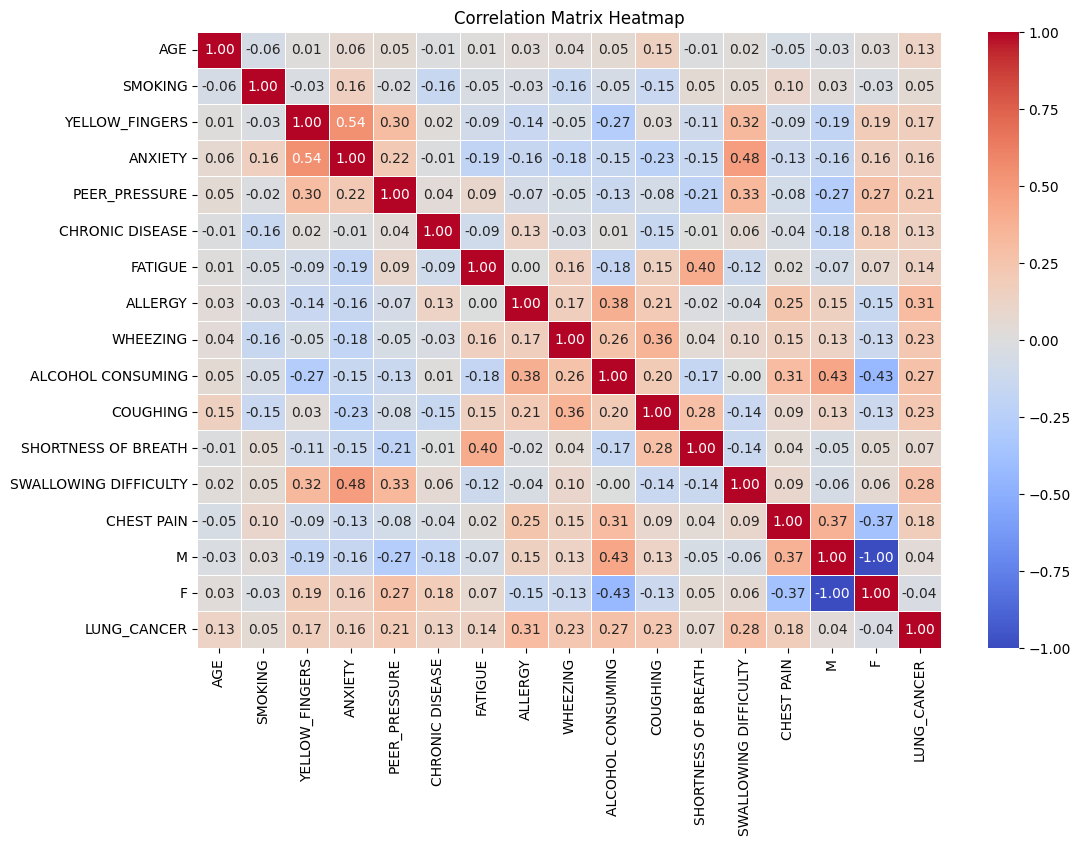

In [488]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Loading all libraries

In [489]:
df = pd.read_excel("lung_cancer_s.xlsx")

In [490]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,F,49,2,1,1,2,2,1,1,2,1,2,2,2,no
1,F,68,2,2,1,1,1,2,2,1,2,1,1,1,yes
2,F,38,1,2,1,2,2,1,2,1,1,1,1,2,yes
3,F,67,1,2,1,1,1,1,2,1,2,2,2,1,yes
4,M,72,1,1,1,1,1,2,1,1,2,2,2,2,no


In [491]:
df.describe()

,age,smoking,yellow_fingers,anxiety,peer_pressure,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,CHEST PAIN
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000
mean,57.822000,1.518000,1.504000,1.512000,1.454000,1.526000,1.496000,1.486000,1.512000,1.514000,1.486000,1.5200,1.558000
std,21.063943,0.500176,0.500485,0.500357,0.498378,0.499824,0.500485,0.500305,0.500357,0.500305,0.500305,0.5001,0.497122
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000
25%,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000
50%,58.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.0000,2.000000
75%,75.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000
max,95.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000


# Oversampling the dataset

In [492]:
# from imblearn.over_sampling import RandomOverSampler
# X = df.iloc[:, 0:len(df.columns) - 1]
# y = df.iloc[:, len(df.columns) - 1]
# ros = RandomOverSampler(random_state=42)
# X_ros, y_ros = ros.fit_resample(X, y)
# X_ros_df = pd.DataFrame(X_ros, columns=X.columns)
# y_ros_df = pd.Series(y_ros, name=y.name)
# df_ros = pd.concat([X_ros_df, y_ros_df], axis=1)
# df = df_ros.copy()

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               500 non-null    object
 1   age                  500 non-null    int64 
 2   smoking              500 non-null    int64 
 3   yellow_fingers       500 non-null    int64 
 4   anxiety              500 non-null    int64 
 5   peer_pressure        500 non-null    int64 
 6   CHRONIC DISEASE      500 non-null    int64 
 7   FATIGUE              500 non-null    int64 
 8   ALLERGY              500 non-null    int64 
 9   WHEEZING             500 non-null    int64 
 10  ALCOHOL CONSUMING    500 non-null    int64 
 11  COUGHING             500 non-null    int64 
 12  SHORTNESS OF BREATH  500 non-null    int64 
 13  CHEST PAIN           500 non-null    int64 
 14  LUNG_CANCER          500 non-null    object
dtypes: int64(13), object(2)
memory usage: 58.7+ KB


# Preprocessing

# Checking for null values

In [494]:
df.isna().sum()

gender                 0
age                    0
smoking                0
yellow_fingers         0
anxiety                0
peer_pressure          0
CHRONIC DISEASE        0
FATIGUE                0
ALLERGY                0
WHEEZING               0
ALCOHOL CONSUMING      0
COUGHING               0
SHORTNESS OF BREATH    0
CHEST PAIN             0
LUNG_CANCER            0
dtype: int64

# Removing null values

# Checking for duplicate values

In [495]:
df.duplicated().sum()

1

# Removing duplicate values

In [496]:
df.drop_duplicates(inplace=True)

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               499 non-null    object
 1   age                  499 non-null    int64 
 2   smoking              499 non-null    int64 
 3   yellow_fingers       499 non-null    int64 
 4   anxiety              499 non-null    int64 
 5   peer_pressure        499 non-null    int64 
 6   CHRONIC DISEASE      499 non-null    int64 
 7   FATIGUE              499 non-null    int64 
 8   ALLERGY              499 non-null    int64 
 9   WHEEZING             499 non-null    int64 
 10  ALCOHOL CONSUMING    499 non-null    int64 
 11  COUGHING             499 non-null    int64 
 12  SHORTNESS OF BREATH  499 non-null    int64 
 13  CHEST PAIN           499 non-null    int64 
 14  LUNG_CANCER          499 non-null    object
dtypes: int64(13), object(2)
memory usage: 62.4+ KB


# Encoding values in GENDER AND LUNG_CANCER columns

In [498]:
label_encoder = LabelEncoder()
df = pd.get_dummies(df, columns=['gender'])
df["gender_F"] = label_encoder.fit_transform(df["gender_F"])
df["gender_M"] = label_encoder.fit_transform(df["gender_M"])
df["F"] = df["gender_F"]
df["M"] = df["gender_M"]
df.drop(columns=["gender_F", "gender_M"], inplace=True)
df["LUNG_CANCER"] = label_encoder.fit_transform(df["LUNG_CANCER"])

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  499 non-null    int64
 1   smoking              499 non-null    int64
 2   yellow_fingers       499 non-null    int64
 3   anxiety              499 non-null    int64
 4   peer_pressure        499 non-null    int64
 5   CHRONIC DISEASE      499 non-null    int64
 6   FATIGUE              499 non-null    int64
 7   ALLERGY              499 non-null    int64
 8   WHEEZING             499 non-null    int64
 9   ALCOHOL CONSUMING    499 non-null    int64
 10  COUGHING             499 non-null    int64
 11  SHORTNESS OF BREATH  499 non-null    int64
 12  CHEST PAIN           499 non-null    int64
 13  LUNG_CANCER          499 non-null    int32
 14  F                    499 non-null    int64
 15  M                    499 non-null    int64
dtypes: int32(1), int64(15)
memory u

# Changing column positions

In [500]:
df = df[['age', 'smoking', 'YELLOW_FINGERS'.lower(), 'ANXIETY'.lower(), 'PEER_PRESSURE'.lower(), 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY',
         'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',  'CHEST PAIN', 'M',
         'F', 'LUNG_CANCER']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  499 non-null    int64
 1   smoking              499 non-null    int64
 2   yellow_fingers       499 non-null    int64
 3   anxiety              499 non-null    int64
 4   peer_pressure        499 non-null    int64
 5   CHRONIC DISEASE      499 non-null    int64
 6   FATIGUE              499 non-null    int64
 7   ALLERGY              499 non-null    int64
 8   WHEEZING             499 non-null    int64
 9   ALCOHOL CONSUMING    499 non-null    int64
 10  COUGHING             499 non-null    int64
 11  SHORTNESS OF BREATH  499 non-null    int64
 12  CHEST PAIN           499 non-null    int64
 13  M                    499 non-null    int64
 14  F                    499 non-null    int64
 15  LUNG_CANCER          499 non-null    int32
dtypes: int32(1), int64(15)
memory u

# Logistic Regression

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,
                                                    random_state=42)
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)
logistic_regression_pred = logistic_regression.predict(X_test)
log_acc = accuracy_score(y_test, logistic_regression_pred)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_regression_pred))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, logistic_regression_pred))
print("Logistic Regression Classification Report: \n",
      classification_report(y_test, logistic_regression_pred, zero_division='warn'))

521    1
737    1
740    1
660    1
411    1
      ..
408    1
332    1
208    1
613    0
78     1
Name: LUNG_CANCER, Length: 200, dtype: int32
Logistic Regression Accuracy:  0.885
Logistic Regression Confusion Matrix: 
 [[  0  22]
 [  1 177]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.89      0.99      0.94       178

    accuracy                           0.89       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200



# SVM

In [502]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,random_state=42)
svm = SVM_MODEL.SVC(max_iter=15000)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("SVM Confusion Matrix: \n", confusion_matrix(y_test, svm_pred))
print("SVM Classification Report: \n", classification_report(y_test, svm_pred, zero_division=1))


SVM Accuracy:  0.52
SVM Confusion Matrix: 
 [[ 7 45]
 [ 3 45]]
SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.13      0.23        52
           1       0.50      0.94      0.65        48

    accuracy                           0.52       100
   macro avg       0.60      0.54      0.44       100
weighted avg       0.60      0.52      0.43       100



# KNN

In [503]:

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,
                                                    random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))
print("KNN Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
print("KNN Classification Report: \n", classification_report(y_test, knn_pred, zero_division='warn'))


KNN Accuracy:  0.48
KNN Confusion Matrix: 
 [[25 27]
 [25 23]]
KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.48      0.49        52
           1       0.46      0.48      0.47        48

    accuracy                           0.48       100
   macro avg       0.48      0.48      0.48       100
weighted avg       0.48      0.48      0.48       100



# Decision Tree

In [504]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
dt_acc = accuracy_score(y_test, decision_tree_pred)
print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_pred))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test, decision_tree_pred))
print("Decision Tree Classification Report: \n",
      classification_report(y_test, decision_tree_pred, zero_division='warn'))


Decision Tree Accuracy:  0.65
Decision Tree Confusion Matrix: 
 [[36 16]
 [19 29]]
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.69      0.67        52
           1       0.64      0.60      0.62        48

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100



# Graphs


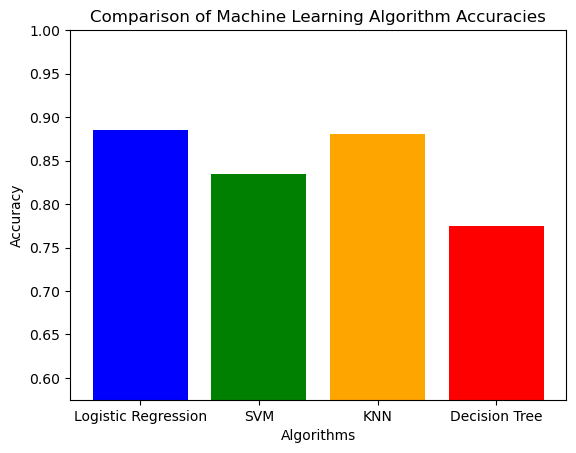

In [128]:

# Algorithms and their accuracies
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
accuracies = [log_acc, svm_acc, knn_acc, dt_acc]

# Create bar chart
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Algorithm Accuracies')
plt.ylim(min(accuracies) - 0.2, 1.0)
plt.show()


In [506]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(30,30))
# plot_tree(decision_tree,fontsize=10)
# plt.show()

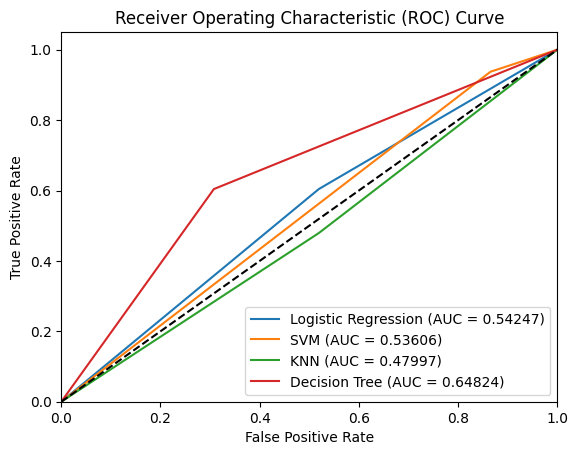

In [507]:
y_true_lr = y_test
y_scores_lr = logistic_regression_pred

y_true_svm = y_test
y_scores_svm = svm_pred

y_true_knn = y_test
y_scores_knn = knn_pred

y_true_dt = y_test
y_scores_dt = decision_tree_pred

fpr_lr, tpr_lr, _ = roc_curve(y_true_lr, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_true_svm, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_true_knn, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_true_dt, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt) 

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.5f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.5f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.5f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.5f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

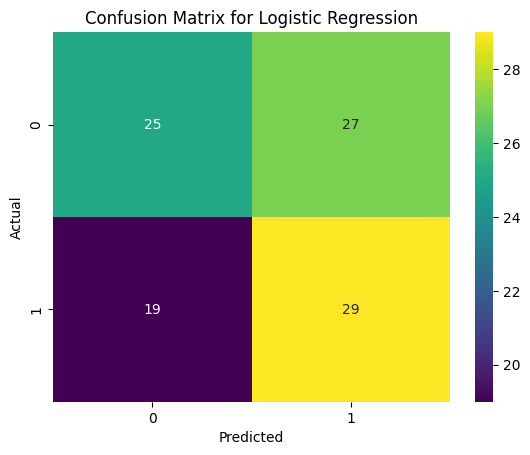

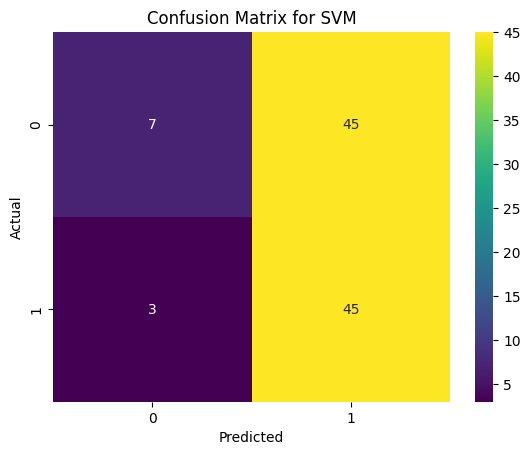

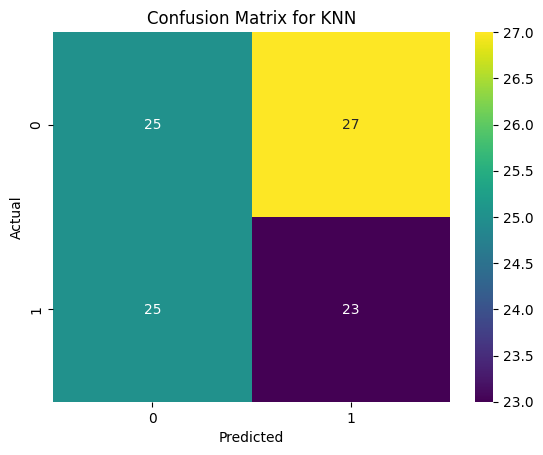

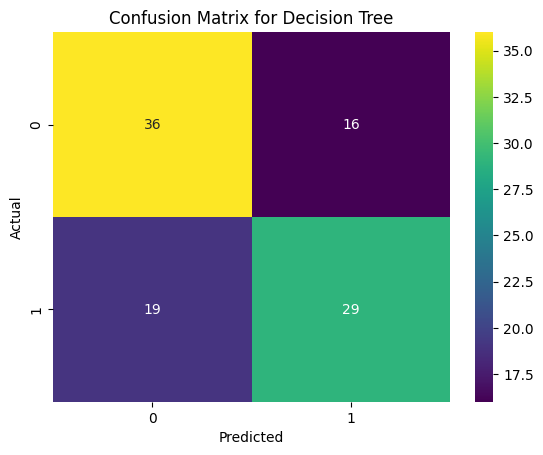

In [508]:
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
y_pred = {
    'Logistic Regression': logistic_regression_pred,
    'SVM': svm_pred,
    'KNN': knn_pred,
    'Decision Tree': decision_tree_pred
}

# Create confusion matrix for each algorithm
for algorithm in algorithms:
    cm = confusion_matrix(y_test, y_pred[algorithm])
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {algorithm}')
    plt.show()


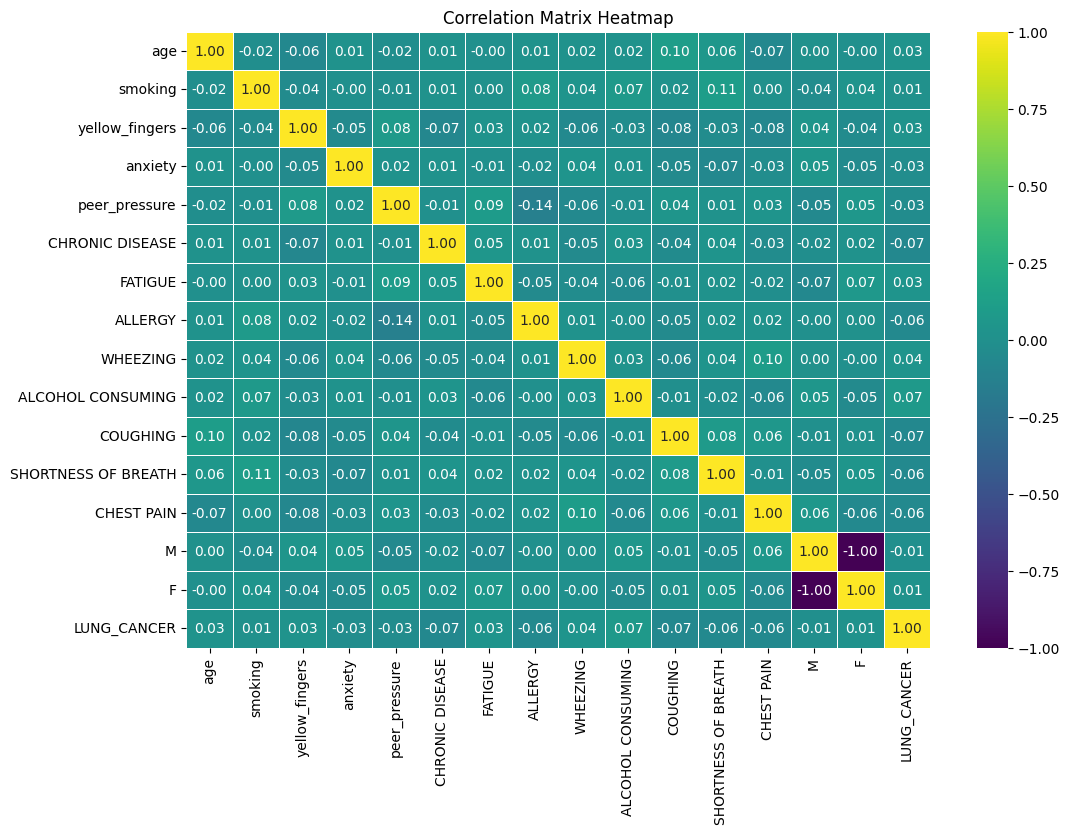

In [509]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()